<a href="https://colab.research.google.com/github/welovecherry/00-AI-Study/blob/main/06_machine_learning/%5BML_Basic%5D_(4_3)_PCA%E1%84%85%E1%85%B3%E1%86%AF_%E1%84%8B%E1%85%B5%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%92%E1%85%A1%E1%86%AB_%E1%84%8E%E1%85%A1%E1%84%8B%E1%85%AF%E1%86%AB%E1%84%8E%E1%85%AE%E1%86%A8%E1%84%89%E1%85%A9%E1%84%8B%E1%85%AA_%E1%84%89%E1%85%B5%E1%84%80%E1%85%A1%E1%86%A8%E1%84%92%E1%85%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (실습) PCA를 이용한 차원축소와 시각화

## 실습 개요

1) **실습 목적**

이번 실습에서는 고차원 데이터가 가진 정보를 최대한 보존하면서 저차원으로 표현하는 방법인 차원축소를 실습합니다. 먼저, 차원축소 방법론의 가장 대표적인 예시인 PCA(Principal Component Analysis)와 그 이론적 기반인 SVD(Singular Vector Decomposition) 행렬분해에 대해 학습합니다. 그 이후, t-SNE(t-distributed Stochastic Neighbor Embedding)를 사용해 고차원 데이터를 2차원 평면에 시각화해봅니다.

2) **수강 목표**

- SVD(Singular Vector Decomposition) 행렬분해의 결과로 나오는 행렬들이 각각 어떤 특성을 가지는지 이해한다.
- PCA(Principal Component Analysis) 이용해 차원축소를 수행할 수 있다.

- t-SNE(t-distributed Stochastic Neighbor Embedding)를 사용해 고차원 데이터를 2차원에 시각화할 수 있다.


### 실습 목차
* 1. SVD(Singular Vector Decomposition) 행렬분해의 특성과 활용
  * 1-1. SVD 구현을 위한 이론
  * 1-2. SVD 구현을 위한 보조함수 정의
  * 1-3. SVD 구현 실습
  * 1-4. SVD 행렬분해 결과의 특성
* 2. Truncated SVD를 통한 행렬의 rank 축소
* 3. PCA 구현 실습: EigenFace
* 4. t-SNE를 이용한 데이터셋 시각화
  - 4-1. 데이터 불러오기
  - 4-2. 데이터 시각화

### 환경 설정

- 패키지 설치 및 임포트

In [ ]:
# 패키지 불러오기
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
# 시각화를 위한 패키지 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import offsetbox

## 1. SVD(Singular Vector Decomposition) 행렬분해의 특성과 활용

```
💡 목차 개요 : SVD(Singular Vector Decomposition) 행렬분해의 결과 행렬들이 어떤 특성을
가지는지 이해한다.
```

- 1-1. SVD 구현을 위한 이론
- 1-2. SVD 구현을 위한 보조함수 정의
- 1-3. SVD 구현 실습
- 1-4. SVD 행렬분해 결과의 특성

### 1-1. SVD 구현을 위한 이론
> SVD행렬분해의 정의에 대해 설명합니다.

#### 📝 설명: SVD (Singular Vector Decomposition) 란?
특이값 행렬분해, SVD란 행렬 $M \in{\mathbb{R}^{m \times n}}$를 다음과 같이 특별한 성질을
가진 3개의 행렬들의 곱으로 나타내는 과정을 말합니다.

$M=U\Sigma V^T$.

여기서 3개의 행렬 U, $\Sigma$, V는 각각
1. $U$는 m차원 정규 직교 행렬 (orthonormal matrix)
2. $\Sigma$(sigma)는 singular value를 성분으로 하는 대각 행렬(diagonal matrix)
3. $V$는 n차원 정규 직교 행렬 (orthonormal matrix)

이라는 특성이 있습니다.



### 1-2. SVD 구현을 위한 보조함수 정의
> 본격적인 내용 설명에 앞서, 행렬은 그 크기가 커질수록 단순히 print했을 때 보기 매우 불편해지기 때문에 시각화를 위한 보조함수를 정의해봅니다.


#### 👨‍💻 코드 : 행렬의 시각화를 위한 보조함수
- 행렬 시각화를 위한 보조함수 `plot_matrix` 정의
- 랜덤 데이터행렬을 생성한 뒤 `plot_matrix`함수를 통해 시각화

In [ ]:
# 행렬 시각화를 위한 보조함수 정의
def plot_matrix(matrix, numbers=True, size_scale=0.7):
    """
    matrix로 주어진 행렬을, 보기쉽게 그려주는 함수입니다.
    행렬의 크기가 큰 경우 numbers를 False로 설정해 각 원소의 값이 표시되지 않도록 하고,
    size_scale을 줄여 전체 크기를 조절할 수 있습니다.
    """
    n_rows, n_cols = matrix.shape
    # 행렬 크기에 비례하도록 figure의 사이즈 설정
    figure_size = (size_scale * n_cols, size_scale * n_rows)
    fig, ax = plt.subplots(figsize=figure_size)
    # 불필요한 부분들 비활성화
    viz_args = dict(cmap='Purples', cbar=False, xticklabels=False, yticklabels=False)
    sns.heatmap(data=matrix, annot=numbers, fmt='.2f', linewidths=.5, **viz_args)

In [ ]:
# 실습파일을 여러번 실행해도 같은 결과가 나오도록 random seed를 고정합니다.
np.random.seed(1234)

# 6x9 크기의 랜덤 행렬을 생성합니다.
M = np.random.randn(6, 9)

# 단순 print을 이용하여 행렬 시각화
print(M)

[[ 4.71435164e-01 -1.19097569e+00  1.43270697e+00 -3.12651896e-01
  -7.20588733e-01  8.87162940e-01  8.59588414e-01 -6.36523504e-01
   1.56963721e-02]
 [-2.24268495e+00  1.15003572e+00  9.91946022e-01  9.53324128e-01
  -2.02125482e+00 -3.34077366e-01  2.11836468e-03  4.05453412e-01
   2.89091941e-01]
 [ 1.32115819e+00 -1.54690555e+00 -2.02646325e-01 -6.55969344e-01
   1.93421376e-01  5.53438911e-01  1.31815155e+00 -4.69305285e-01
   6.75554085e-01]
 [-1.81702723e+00 -1.83108540e-01  1.05896919e+00 -3.97840228e-01
   3.37437654e-01  1.04757857e+00  1.04593826e+00  8.63717292e-01
  -1.22091575e-01]
 [ 1.24712954e-01 -3.22794806e-01  8.41674713e-01  2.39096052e+00
   7.61995878e-02 -5.66445930e-01  3.61419367e-02 -2.07497760e+00
   2.47792200e-01]
 [-8.97156784e-01 -1.36794833e-01  1.82891913e-02  7.55413982e-01
   2.15268581e-01  8.41008795e-01 -1.44581008e+00 -1.40197328e+00
  -1.00918200e-01]]


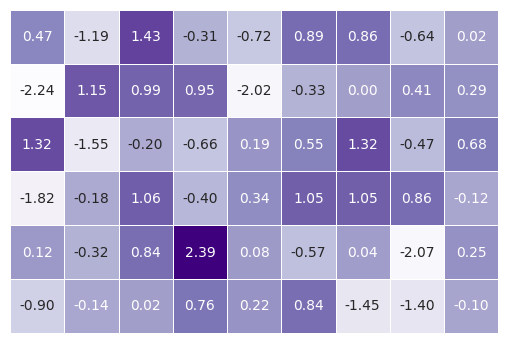

In [ ]:
# 보조함수를 활용하여 행렬 시각화
plot_matrix(M)

### 1-3. SVD 구현 실습

> SVD를 구현합니다.

#### 📝 설명: 전체 SVD과정을 확인하기 위한 보조함수 정의

SVD는 numpy 라이브러리를 활용하여 수행하는데,
numpy에서 SVD를 수행해주는 이 함수(`np.linalg.svd`)는 대각행렬 sigma의 0인 부분을 생략하고 대각성분인 singular value들만 array형태로 리턴해주도록 구현되어있습니다.

실제로 사용할때는 훨씬 실용적인 방식이기는 하지만, 강의에서는 이론상 정확한 설명을 위해
완전한 대각행렬을 반환해주는 새로운 함수 `full_svd`를 정의해
사용하겠습니다.


#### 👨‍💻 코드 : 보조함수 정의
- 전체 SVD과정 확인을 위한 보조함수 `full_svd` 정의
- 이를 이용해 랜덤 행렬에 svd적용

In [ ]:
def full_svd(matrix):
    # numpy를 이용한 SVD를 수행합니다.
    U, singular_values, V = np.linalg.svd(matrix)

    # numpy의 svd 결과로 나오는 sigma의 diagonal 성분을 가지고 diagonal matrix를 복원해줍니다.
    m, n = matrix.shape       # matrix 행렬의 차원
    sigma = np.zeros([m, n])  # matrix 행렬과 같은 차원의 영행렬을 만들어둡니다.

    rank = len(singular_values)  # rank 계산
    sigma[:rank, :rank] = np.diag(singular_values)  # rank까지만 복원
    return U, sigma, V.T

In [ ]:
# SVD 수행
U, Sigma, V = full_svd(M)


#### 👨‍💻 코드 : SVD결과로부터 원본 행렬 복원
- 분해 결과 행렬을 통해 원본 행렬이 복원되는지 확인

Maximum diff:  3.9968028886505635e-15


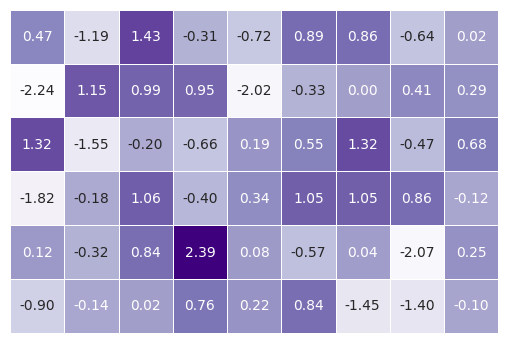

In [ ]:
# 파이썬의 @ 연산자를 이용하면 np.dot 함수와 같은 행렬곱이나 내적을 편리하게 호출할 수 있습니다.
restored = U @ Sigma @ V.T # T는 전치행렬(transpose)

# 행렬 시각화
plot_matrix(restored)
print("Maximum diff: ", np.abs(M - restored).max())

#### 📝 설명: Truncation Error
복구된 행렬과 원래 행렬 사이 오차의 최대값이 사실상 0이라고 볼수 있는 `e-15`, 즉 $10^{-15}$ 정도의 스케일이므로 행렬분해가 문제없이 수행되었음을 알 수 있습니다.

참고로, 컴퓨터 내의 숫자표기는 메모리의 효율성을 위해 그 정밀도가 어느정도 제한되어 있기 때문에 이 정도
수준의 오차는 어쩔수 없이 항상 발생하게 됩니다. 이를 Truncation Error라고 부릅니다.




### 1-4. SVD 행렬분해 결과의 특성
> SVD 행렬분해 결과인 U, Sigma, V가 각각 어떤 특성을 가지는지 알아봅니다.

행렬 U, $\Sigma$, V는 각각 다음과같은 shape을 가지고 있어, 순서대로 곱했을 때 원래의 행렬과 같은 크기가 됩니다.


In [ ]:
# U, Sigma, V의 shape 확인
print(U.shape, Sigma.shape, V.shape)

(6, 6) (6, 9) (9, 9)


#### 📝 설명 : 정규직교행렬(orthonormal matrix) U, V
행렬 U와 V는 모두 선형대수학에서 정규직교행렬(orthonormal matrix)이라고 부르는 행렬입니다.
이 행렬은 시각화 결과에서 보이듯이 육안으로 눈에 띄는 특성이 있는것은 아니지만, 각 행을 별개의 벡터로 볼때 모두가 서로 직교하고, 길이(norm)가 1인 행렬로 정의됩니다.

이런 정의로 인해 정규직교행렬은 자기자신의 transpose와 곱했을 때 단위행렬이 나온다는, 즉
단순히 transpose만 해주면 역행렬이 된다는 편리한 특성을 지닙니다.


#### 👨‍💻 코드 : U, V의 정규직교행렬로서의 특성 확인
- 정규직교행렬의 정의에 따른 특성 확인
- 역행렬과 곱해서 단위행렬이 나오는것 확인

다음 두 셀은 V에 대해 수행해도, 행렬의 크기만 다를 뿐 같은 결과를 확인할 수 있습니다.

-3.8337388819087437e-16
1.0000000000000009


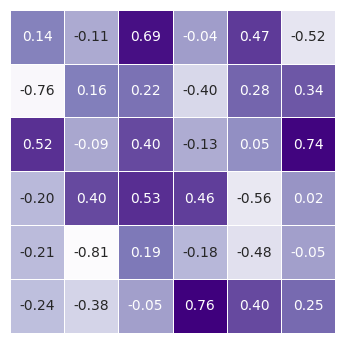

In [ ]:
# 행렬 U를 시각화
plot_matrix(U)

# 행렬의 서로 다른 row를 골라 내적하면 0이 나옵니다.
print(U[1] @ U[3])

# 자기 자신과의 내적(벡터의 norm, 길이라고 생각할수 있는 개념)은 항상 1이 나옵니다.
print(U[1] @ U[1])

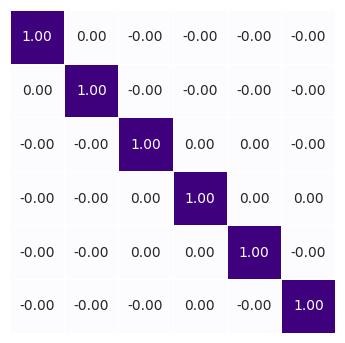

In [ ]:
# U @ U.T 행렬 시각화
plot_matrix(U @ U.T)

이제, $\Sigma$의 특성을 확인해보겠습니다.

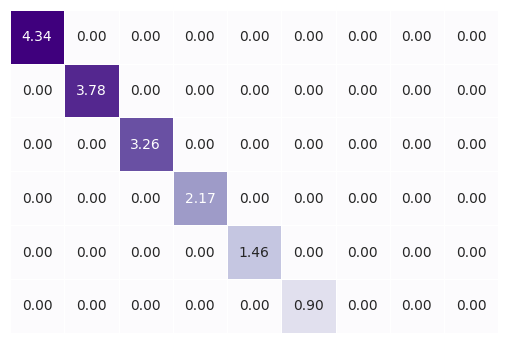

In [ ]:
# Sigma 행렬 시각화
plot_matrix(Sigma)

$\Sigma$는 singular value를 대각성분으로 하는 대각행렬이며, SVD의 결과에서 이 대각선 성분은
보시다시피 뒤로 갈수록 값이 작아지도록 정렬되어있습니다. singular value는 행렬의 eigen value와
관련된 개념으로, 이와 관련되어서 SVD의 수많은 흥미로운 특성들을 유도해낼 수 있지만, 여기에서는 생략하고, 다음의 특성에 주목해보겠습니다.

행렬 $\Sigma$에서 단 한개, k번째의 값만 남기고 나머지를 전부 0으로 만든 $\Sigma_k$라는 행렬을 생각해보겠습니다.

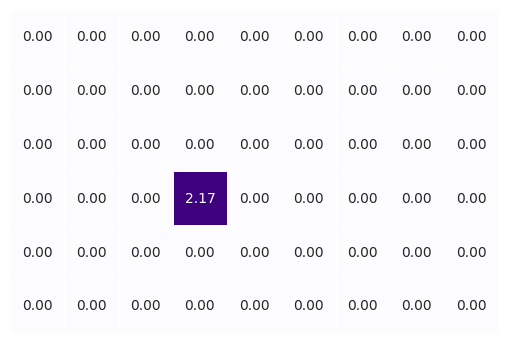

In [ ]:
# 행렬의 (k,k)번째 원소만 남기고 나머지를 0으로 만드는 함수 정의
def select_diag(sigma, k):
    result = np.zeros_like(sigma)  # 영행렬 만들어두기
    result[k, k] = sigma[k, k]  # sigma 행렬의 (k,k) 원소만 남김
    return result

# Sigma의 (k,k)번째 원소만 남기고 나머지를 0으로 만들기
sigma_k = select_diag(Sigma, 3)
# 결과 행렬 시각화
plot_matrix(sigma_k)

행렬 M이 r개의 singular value를 가진다고 할 때

$\Sigma = \Sigma_0 + \Sigma_1 + ... \Sigma_r$이므로, 위의 SVD식을 다음과 같이 적을 수 있으며:

$M=U\Sigma V^T = U\Sigma_0V^T + U\Sigma_1V^T + ... U\Sigma_rV^T$,

이 식을 코드로는 다음과 같이 확인해볼 수 있습니다.

Maximum diff:  3.9968028886505635e-15


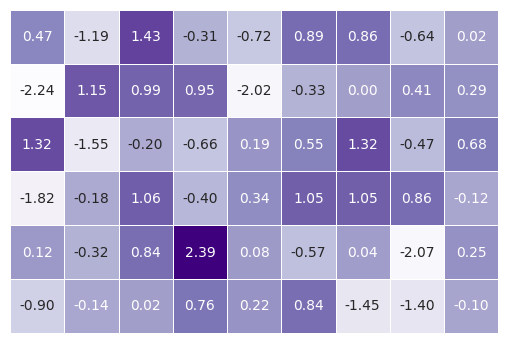

In [ ]:
# 원래 행렬의 rank
r = np.linalg.matrix_rank(M)

# 결과 행렬을 미리 initialize
result = np.zeros_like(M)
for k in range(r):
    # Sigma_k를 계산 후 결과행렬에 더해줌.
    sigma_k = select_diag(Sigma, k)
    result += U @ sigma_k @ V.T

# 결과 행렬과 원래 행렬의 차이를 계산
print("Maximum diff: ", np.abs(M - result).max())
# 결과 행렬 시각화
plot_matrix(result)

그런데, $\Sigma_k$는 결국 (k, k) 원소만 0이 아닌 행렬이므로, 다음과 같이 U와 V의 k번째 열벡터
하나씩만 가지고도 계산하더라도 완전히 동일한 결과를 얻을 수 있습니다.

Maximum diff:  3.9968028886505635e-15


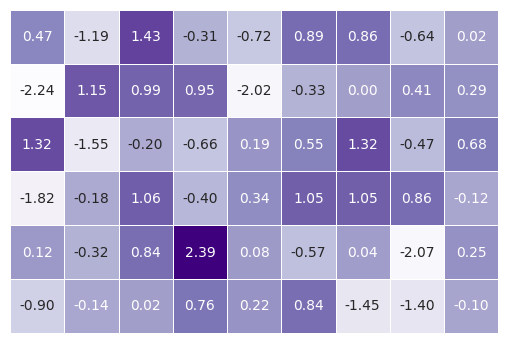

In [ ]:
# k번째 열벡터를 가져오는 함수를 정의
def col_vec(matrix, k):
    return matrix[:, [k]]

# 원래 행렬의 rank
r = np.linalg.matrix_rank(M)

# 결과 행렬을 미리 initialize
result = np.zeros_like(M)
for k in range(r):
    # k번째 singular value, 스칼라값
    sig_k = Sigma[k, k]
    # U, V에서 한개의 column vector만을 가져와 사용해도 위 셀과 동일한 결과
    result += sig_k * col_vec(U, k) @ col_vec(V, k).T

# 결과 행렬과 원래 행렬의 차이를 계산
print("Maximum diff: ", np.abs(M - result).max())
# 결과 행렬 시각화
plot_matrix(result)

여기에서 각 단계에 더해진 행렬들처럼, 두 벡터의 곱으로 표현되는 행렬은 선형대수학에서 rank-1
matrix라고 부르는 개념으로,
크기는 행렬이지만 가지고있는 정보량은 곱해지는 벡터 두개와 동일하다는 특성을 가지며,
행렬을 만드는 기본단위처럼 사용되는 개념입니다.

(6, 1)
(1, 9)
(6, 9)
Rank of resulting Rank-1 Matrix:  1


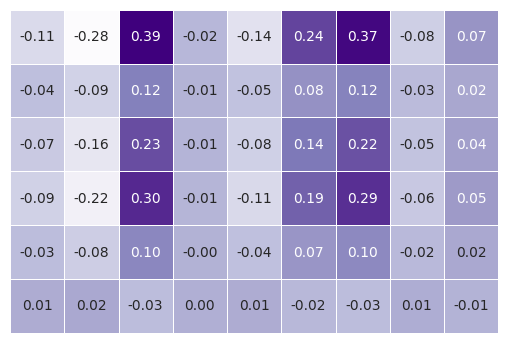

In [ ]:
# 임의의 k를 선택합니다.
k = 2
# 곱해지는 U, V의 열벡터를 표시합니다.
print(col_vec(U, k).shape)
print(col_vec(V, k).T.shape)

# 두 벡터의 행렬곱으로 rank-1 matrix를 만듭니다.
rank1_mat = col_vec(U, k) @ col_vec(V, k).T

print(rank1_mat.shape)

# 이름처럼 rank는 1로 나옵니다.
print("Rank of resulting Rank-1 Matrix: ", np.linalg.matrix_rank(rank1_mat))

# matrix의 값들을 살펴보면, 첫번째 row에 스칼라곱을 해서 나머지 모든
# row를 만들수 있고(linearly dependence), 이는 column도 마찬가지입니다.
plot_matrix(rank1_mat)

## 2. Truncated SVD를 통한 행렬의 rank 축소

#### 📝 설명: Truncated SVD를 통한 행렬의 rank 축소

위에서는 rank가 r인(r개의 singular value를 가지는) 행렬 M이 있을 때,
SVD를 활용하면 이를 r개의 rank1 matrix들의 합으로 표현할 수 있다는 것을 알아보았습니다.
Truncated SVD란 이를 활용해, r개의 성분들 중 크기가 작은 것들을 버리고 행렬 M을 낮은 rank의 행렬로 나타내는 차원축소 방법론이라고 이해할 수 있습니다.

먼저, 위에 작성했던 코드를 살짝 수정해, Truncated SVD를 통한 차원축소를 수행하는 함수를 정의해보겠습니다.

In [ ]:
def reduce_dim(M, n_components=None):
    # 주어진 행렬 M을 SVD합니다.
    U, Sigma, V = full_svd(M)

    r = np.linalg.matrix_rank(M)
    if n_components is None:
        # 몇개의 성분을 남길지 주어지지 않으면 아무것도 버리지 않고 전체 성분을 남깁니다.
        n_components = r

    # 남길 component 수가 전체 랭크보다 크면 에러 메시지 보여줍니다.
    assert n_components <= r, \
        f"남길 component의 개수({n_components})는 전체 랭크{r}보다 클 수 없습니다."

    # 결과 행렬을 미리 initialize
    result = np.zeros_like(M, dtype=np.float64)
    # 이번에는 r개가 아니라, 첫 n_components개까지만 rank-1 matrix들을 더해줍니다.
    for k in range(n_components):
        # k번째 singular value, 스칼라값과
        sig_k = Sigma[k, k]
        # rank1 행렬에 위 sig_k 스칼라값을 곱해 결과에 더함.
        result += sig_k * col_vec(U, k) @ col_vec(V, k).T
    return result

이제 다음 셀에서 truncated_svd를 통해 첫 k개의 성분만 남긴 행렬과 원래 행렬을 비교해볼 수 있습니다.

In [ ]:
# 남길 성분의 수. 이 값을 0~6까지 직접 값을 조절해볼수 있습니다.
n_components = 5
size_scale = 0.6 # 비교해보기 편하도록 figure크기를 살짝 줄입니다.

# 원래 행렬의 rank를 구해봅니다.
print("Original rank: ", np.linalg.matrix_rank(M))

# TruncatedSVD를 수행해 n_component개의 성분만 남깁니다.
result = reduce_dim(M, n_components)

# TruncatedSVD 결과 행렬의 rank와 원본 행렬과의 값 차이를 프린트합니다.
print("Result rank: ", np.linalg.matrix_rank(result))
print("Maximum diff: ", np.abs(M - result).max())

Original rank:  6
Result rank:  5
Maximum diff:  0.4306720751871573


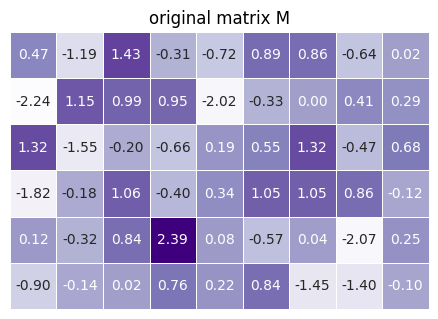

In [ ]:
# 원래의 행렬
plot_matrix(M, size_scale=size_scale)
plt.title('original matrix M')  # 구분을 위해 시각화 제목 넣기
plt.show()                      # 그림 보여주기

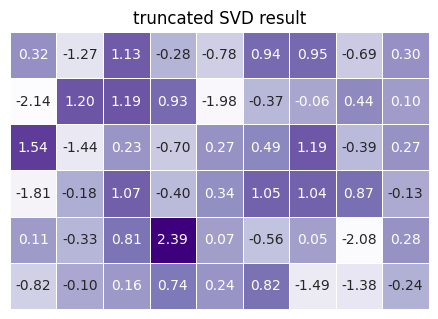

In [ ]:
# truncated svd 결과 행렬
plot_matrix(result, size_scale=size_scale)
plt.title('truncated SVD result')  # 구분을 위해 시각화 제목 넣기
plt.show()               # 그림 보여주기

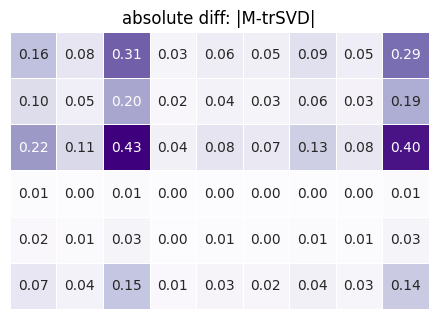

In [ ]:
# 원래 행렬과의 차이(absolute diff)
plot_matrix(np.abs(M - result), size_scale=size_scale)
plt.title('absolute diff: |M-trSVD|')  # 구분을 위해 시각화 제목 넣기
plt.show()                  # 그림 보여주기

## 3. PCA 구현 실습: EigenFace

```
💡 목차 개요 : PCA(Principal Component Analysis) 이용해 차원축소를 수행할 수 있다.
```


#### 📝 설명: EigenFace

EigenFace는 1990년대 연구되었던 얼굴인식(Face Recognition)을 위한 방법론으로, PCA를
이용해 사람의 얼굴 이미지를 저차원의 벡터로 표현하고, 이를 서로 비교해 같은 사람인지 아닌지 판단하는 방식으로 작동합니다. 여기서는 The Olivetti faces 데이터셋 ([링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html))을
가져와, Eigen Face의 차원축소가 어떻게 작동하는지 실습해봅니다.

#### 📚 자료

*  [Faces dataset decompositions](https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py) : scikit
learn에서 제공하는 공식 튜토리얼 문서로, 이 실습코드에서 Olivetti faces 데이터셋의 처리와 시각화
부분은 해당 문서의 코드를 참고하여 작성했습니다. 이 실습코드가 PCA라는 한가지 방법론의 원리를
설명하는데에 집중했다면, 위 문서에서는 같은 데이터에 다양한 방식의 차원축소를 적용해 어떤 차이가 나타나는지 예시를 확인해볼 수 있습니다.


In [ ]:
# 데이터 불러오기
faces, _ = datasets.fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=1234)

n_samples, n_features = faces.shape
print('데이터 수:', n_samples) # 데이터 수 확인
print('차원 수:', n_features) # 차원수 확인

데이터 수: 400
차원 수: 4096


In [ ]:
# 첫번째 데이터 확인하기
faces[0, :]

array([0.5082645 , 0.5082645 , 0.5082645 , ..., 0.60330576, 0.59504133,
       0.59917355], dtype=float32)

데이터를 불러오면 위와같이 일반적인 0~255값(uint8타입)의 이미지들이 아니라  
400x4096의 커다란 float타입 행렬이 불러와집니다. 이는 이 데이터셋이 이미지를 미리 가공된 상태로
제공하기 때문인데, 400장의 이미지 각각을 flatten하여 vector로 만들고, 이를 row vector로 하는
행렬로 만든것입니다.

In [ ]:
# 데이터 범위 확인하기
print('평균:', faces.mean())
print('최댓값:', faces.max())
print('최솟값:', faces.min())

평균: 0.54704267
최댓값: 1.0
최솟값: 0.0


데이터의 각 값들은 0에서 1 사이의 값을 가집니다.



이 데이터를 우리가 알아볼 수 있는 이미지의 형태로 확인하려면 별도의 변환 과정을 거쳐야 하는데,
한번 400개중 하나의 이미지를 선택해서, 이미지로 변환해보겠습니다.

105-th row of matrix


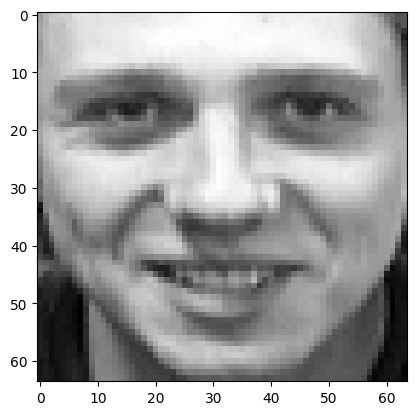

In [ ]:
# 가져올 샘플의 번호를 랜덤으로 고름
index = np.random.choice(len(faces))
print(f"{index}-th row of matrix")

# 원본 이미지의 크기
img_h, img_w = (64, 64)

# 데이터(faces)에서 샘플(row)을 선택해 가져오기
face_vector = faces[index]

# 이미지를 원래의 크기로 변환한 후 display
face_image = face_vector.reshape(img_h, img_w)
plt.imshow(face_image, cmap="gray")

지금은 matplotlib의 `imshow`함수가 **0\~1 범위의 float 숫자**도 이미지로 쉽게 변환해볼 수 있는 기능을 지원하기 때문에, 값의 범위를 **0\~255 범위의 픽셀값(int)**으로 변환하는 작업은 하지 않아도 괜찮습니다.
하지만 PCA분석을 위해서는 다음 각 데이터의 feature-wise, sample-wise로 평균이 모두 0이
되어야하므로 이에 맞춰 다음과 같이 전처리를 수행해준 이후에는 별도의 scaling 과정을 거쳐야 제대로
이미지를 확인할 수 있습니다.

In [ ]:
# 전체 샘플단위의 평균을 구하고, 이를 원본 데이터에서 빼서 평균을 0으로 맞춰줌
samplewise_mean = faces.mean(axis=0) # (4096, )
faces_centered = faces - samplewise_mean

# 각 이미지마다 모든 픽셀값의 평균을 구하고, 이를 원본 이미지에서 빼는 방식으로 평균을 0으로 맞춰줌
pixelwise_mean = faces_centered.mean(axis=1).reshape(n_samples, -1) # (400, )
faces_centered -= pixelwise_mean

In [ ]:
# 시각화를 위한 함수 정의하기
def plot_faces(title, images, n_cols=3, n_rows=2, shuffle=False, cmap="gray", size_scale=2.0, random_seed=0, image_shape=(64, 64)):
    # plot할 이미지(벡터)들을 랜덤으로 선택
    if shuffle:
        np.random.seed(random_seed)
        indices = np.random.choice(len(images), n_cols * n_rows)
    else:
        indices = np.arange(n_cols * n_rows)

    # figure관련 설정
    fig, axs = plt.subplots(
        nrows=n_rows,
        ncols=n_cols,
        figsize=(n_cols * size_scale, n_rows * size_scale),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)

    # 각 자리에 들어가는 얼굴 이미지를 plot
    for ax, idx in zip(axs.flat, indices):
        face_vec = images[idx]
        vmax = max(face_vec.max(), - face_vec.min())
        im = ax.imshow(
            face_vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")
    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

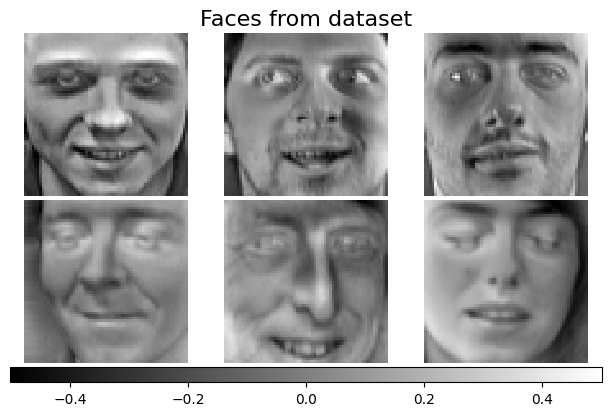

In [ ]:
# 이미지 6개 시각화하기
plot_faces("Faces from dataset", faces_centered, shuffle=True, random_seed=1234)

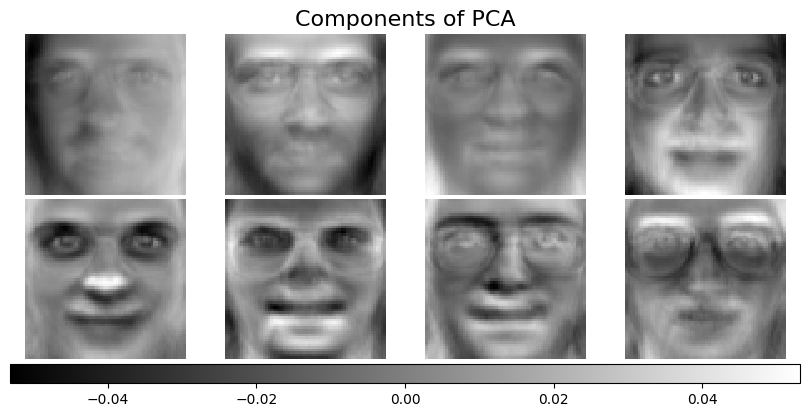

In [ ]:
# 줄일 차원의 수 지정하기
n_components = 20

# PCA 수행하기
pca_estimator = PCA(n_components=n_components, svd_solver="full", whiten=True)
pca_estimator.fit(faces_centered)

# PCA 결과 (Eigenface) 시각화
plot_faces("Components of PCA", pca_estimator.components_, n_rows=2, n_cols=4)

위에서 방금 수행한 작업은 400개의 얼굴 이미지들을 서로 구분하는데 가장 유의미한 첫 8개의
components들을 다시 이미지의 형태로 시각화한것입니다.

이를 이해하기 위해 400개의 이미지들 중 하나를 골라 차원축소된 벡터와 components로 원본 이미지를 복원해보도록 하겠습니다.

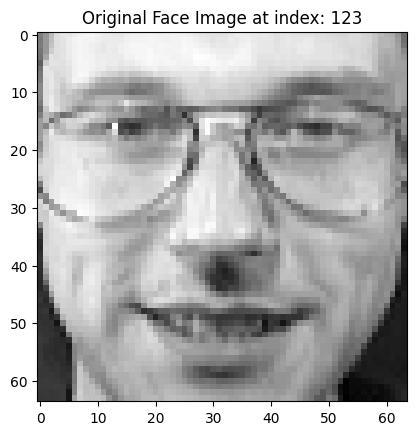

In [ ]:
# 원본 이미지중에 임의로 하나를 고릅니다.
index = 123
indices = np.random.choice(n_samples, 6)
# 원본 이미지를 보여줍니다.
plt.title(f"Original Face Image at index: {index}")
plt.imshow(faces[index].reshape(64, 64), cmap="gray")

이 이미지는 원래의 4096(64*64)차원에서, PCA estimator를 통해 차원축소되어 다음과 같은 `n_components` 차원 벡터로 표현됩니다.

In [ ]:
# 차원축소된 벡터 계산하기
reduced_vec = pca_estimator.transform(faces_centered[index].reshape(1, -1))
print(reduced_vec)
print('차원 축소된 벡터의 크기:', reduced_vec.shape)

[[-0.94087565  0.14278993 -1.5851119  -0.17483756  1.2675631  -0.31879953
  -0.71994126  1.6460576   0.38832128 -1.4495701  -0.18705276  0.75428915
   0.28384566  1.716027    1.5398295   0.9073783  -0.15088242  0.8249149
  -0.510783   -0.7519212 ]]
차원 축소된 벡터의 크기: (1, 20)


fitting 된 PCA의 component들을, 위 reduced_vec의 원소를 계수로 하는 선형결합하면,
다음과 같이 원본 이미지를 복원할 수 있습니다.

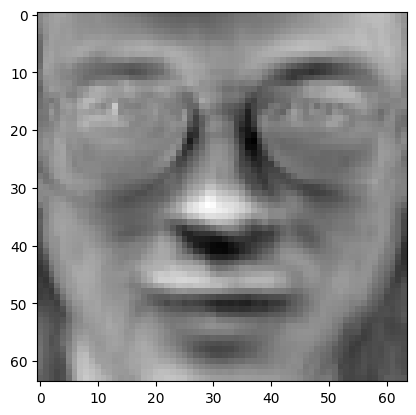

In [ ]:
# 결과 행렬 미리 initialize
canvas = np.zeros([64, 64], dtype=np.float64)
for value, comp in zip(reduced_vec[0], pca_estimator.components_):
    # 각 component 벡터를 이미지 크기로 resize한 뒤, 이를 차원축소된 벡터의 각 값과 선형결합
    canvas += comp.reshape(64, 64) * value

vmax = max(canvas.max(), - canvas.min())

plt.imshow(canvas, cmap="gray", vmax=vmax, vmin=-vmax)

지금은 축소된 차원의 수, `n_components`가 너무 작아 복원된 이미지가 원본과 같은 이미지라는 것은
겨우 알아볼 수 있을 정도지만, 원본 이미지의 디테일한 부분들은 상당히 소실된 상태입니다.
`n_components` 값에 따라 차원축소된 이미지가 어떤 형태로 나타나는지 아래에서 비교해봅니다.

In [ ]:
# 원본 이미지와 차원축소된 이미지들 비교하기
def compare_reduced_faces(title, images, index=123, n_components_list=[5, 20, 100], n_cols=4, n_rows=1, shuffle=False, cmap="gray", size_scale=2.5, random_seed=0, image_shape=(64, 64)):
    # 그림 관련 설정
    fig, axs = plt.subplots(
        nrows=n_rows, ncols=n_cols,
        figsize=(n_cols * size_scale, n_rows * size_scale),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")

    # 보여줄 이미지 선정
    face_vec = faces[index]

    # 첫 이미지로 원본 이미지를 보여줍니다.
    axs[0].set_title("Original Face Image", y=-0.2)
    axs[0].imshow(face_vec.reshape(image_shape), cmap="gray")
    axs[0].axis("off")

    # 다음 이미지부터는 PCA를 이용해 차원축소된 이미지를 보여줍니다.
    # 각 차원마다 보여주므로 줄일 차원의 수 리스트 중 하나씩 지정하여 PCA를 수행합니다.
    for img_index, n_components in enumerate(n_components_list):

        # PCA 수행하기
        pca_estimator = PCA(n_components=n_components, svd_solver="full", whiten=True)
        pca_estimator.fit(images)

        # 차원축소된 벡터 계산하기
        reduced_vec = pca_estimator.transform(face_vec.reshape(1, -1))
        # 결과 행렬 미리 initialize
        canvas = np.zeros([64, 64], dtype=np.float64)
        for value, comp in zip(reduced_vec[0], pca_estimator.components_):
            # 각 component 벡터를 이미지 크기로 resize한 뒤, 이를 차원축소된 벡터의 각 값과 선형결합
            canvas += comp.reshape(64, 64) * value

        # PCA 결과 (Eigenface) 시각화
        vmax = max(canvas.max(), - canvas.min())
        im = axs[img_index+1].imshow(
            canvas.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        axs[img_index+1].axis("off")
        axs[img_index+1].set_title(f'Dimension={n_components}', y=-0.2)

    # 최종 이미지 보여주기
    plt.suptitle(title + f': images at index {index}', fontsize=20)
    plt.show()

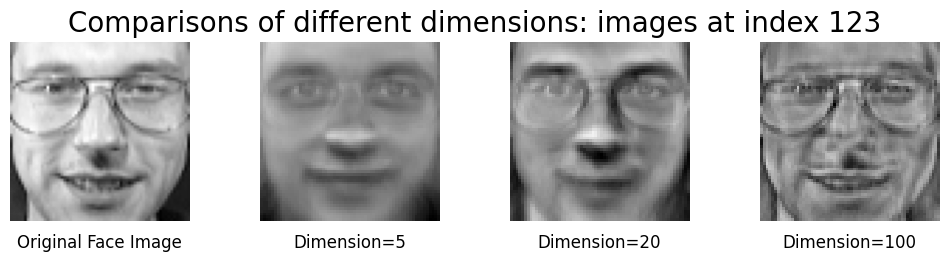

In [ ]:
compare_reduced_faces('Comparisons of different dimensions', faces_centered, n_components_list=[5, 20, 100])

`n_components`가 5일 때, 즉 5차원으로 축소시키면 사람이라는 이미지는 인식할 수 있으나 원본 이미지에 나타난 사람과는 다소 차이가 있고 안경도 인식할 수 없습니다.
`n_components`가 100일 때는 원본 이미지의 여러 디테일한 정보들까지 함께 복원되었습니다.
이처럼 `n_components` 값을 늘리면 좀더 세세한 정보들까지 유지하면서 차원축소를 진행할 수 있지만, 대신 그만큼 차원 수가
덜 줄어드는 것이므로 어느정도 적당한 선에서 결정해야 합니다.

어느정도의 `n_components`의 값이 적절한지는 데이터가 가지고있는 정보량, 즉
얼마나 예측 가능한 정보인가에 따라 달라집니다. 예시를 위해 매우 높은 "정보량"을 가진 랜덤 행렬을 만들어
PCA로 피팅했을 때 위의 결과와 어떤 차이가 있는지 살펴보겠습니다.

방금의 PCA에 사용된 singular values, 즉 $\Sigma$의 대각 원소들은 다음과 같습니다. 이 값들은 각
성분, 즉 component가 이미지들을 서로 구분하는데 얼마나 중요한지를 나타내는데, 뒤로갈수록 빠르게 값이
작아지는 것, 즉 해당 성분이 이미지의 구분에 덜 중요하다는 것을 확인할 수 있습니다.

In [ ]:
# singular value 확인하기
pca_estimator.singular_values_

array([67.12954  , 50.259663 , 41.992897 , 37.27193  , 31.780447 ,
       28.802639 , 25.47033  , 25.337267 , 23.112793 , 22.469479 ,
       21.306616 , 20.094719 , 19.48187  , 18.365597 , 17.794641 ,
       17.228048 , 16.356888 , 15.426773 , 15.386463 , 14.9818735],
      dtype=float32)

비교를 위해, 위의 얼굴 데이터와 크기, 모양이 같지만 값 자체는 그냥 랜덤정규분포에서 샘플링한 가짜 데이터
행렬을 만들어 PCA fitting을 수행해보겠습니다.

In [ ]:
# 기존 faces데이터셋과 같은 크기의 랜덤 정규분포 데이터를 생성
random_noises = np.random.randn(*faces_centered.shape)

# 이 랜덤 포인트에 대해 PCA 수행하기
pca_estimator = PCA(n_components=n_components, svd_solver="full", whiten=True)
pca_estimator.fit(random_noises)

PCA(n_components=20, svd_solver='full', whiten=True)

이 경우에는 singular value의 분포가 눈으로 보기에도 확연히 다른것을 알 수 있는데, 뒤로갈수록 크기가
확연히 줄어드는 얼굴데이터의 singular values에 비해 랜덤행렬의 singular values는 줄어들기는
하지만 감소폭이 훨씬 약한것을 볼수 있습니다.

In [ ]:
# singular value 확인하기
pca_estimator.singular_values_

array([83.5887657 , 82.92722517, 82.69418105, 82.31875922, 82.17663953,
       82.03255736, 81.88078954, 81.84987268, 81.63063712, 81.44304361,
       81.22199917, 80.98240317, 80.81881545, 80.72756242, 80.6510092 ,
       80.38059351, 80.12909358, 80.02599407, 79.85653646, 79.72950215])

`n_components`를 최대로 설정해 더 많은 값들을 확인해봐도 동일한 결과가 나옵니다. 즉, 랜덤하게 생성된 데이터 행렬의 signular value의 감소폭보다 얼굴 데이터의 감소폭이 훨씬 큽니다.

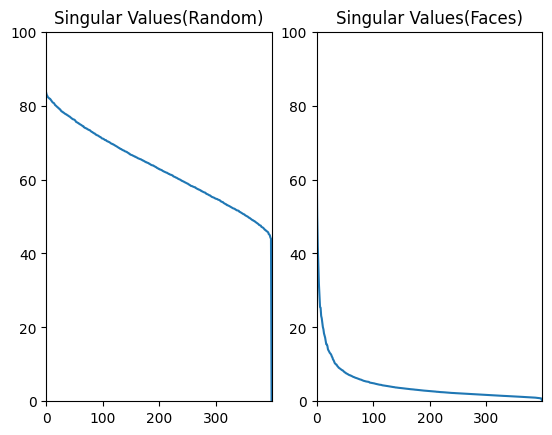

In [ ]:
# 얼굴 데이터에 대해 최대 n_components로 PCA 수행하기
pca_faces = PCA(n_components=400, svd_solver="full", whiten=True)
pca_faces.fit(faces_centered)
sv_faces = pca_faces.singular_values_

# 랜덤 데이터에 대해 최대 n_components로 PCA 수행하기
pca_random = PCA(n_components=400, svd_solver="full", whiten=True)
pca_random.fit(random_noises)
sv_random = pca_random.singular_values_


# 각각의 singular value들을 plot해 비교.
plt.subplot(121)
plt.title("Singular Values(Random)")
plt.xlim(0, 399)
plt.ylim(0, 100)
plt.plot(sv_random)

plt.subplot(122)
plt.title("Singular Values(Faces)")
plt.xlim(0, 399)
plt.ylim(0, 100)
plt.plot(sv_faces)

이는 PCA가 수행하는 작업이 결국 샘플, 피쳐 간의 상호 연관성, 즉, 같은 이미지의 다른 부분이나 데이터셋 내의 다른 이미지를 가지고 얼마나 쉽게 이미지의 특정 부분을 추측할 수 있느냐에 따라 달라지게 된다는 것을 의미합니다.

사람의 얼굴 이미지는 서로 많이 다르지만 상당히 많은 유사성을 갖고 있기에 첫 몇 개의 components의 영향을 크게 받는 것이고 그래서 차원축소를 많이 해서 성분의 수를 많이 줄이더라도 원본 이미지가 알아볼 수 있게 복원됩니다.

완전 랜덤으로 생성한 행렬의 경우는 데이터셋의 한 영역으로부터 다른 영역을 복원하는 것이 거의 불가능에 가깝기 때문에, 차원을 줄였을 때 손실되는 정보의 비율이 매우 크고, 차원축소가 거의 동작하지 않는다고 보아도 무방합니다.

실제 현실의 데이터에 PCA를 수행할때는 이런 데이터의 패턴과 예측 가능성을 보고 몇 개 정도의 components를 사용할지 결정하게 됩니다.

## 4. t-SNE(t-distributed Stochastic Neighbor Embedding)를 이용한 데이터셋 시각화

```
💡 목차 개요 : t-SNE(t-distributed Stochastic Neighbor Embedding)를 사용해 고차원 데이터를 2차원에 시각화할 수 있다.
```

- 4-1. 데이터 불러오기
- 4-2. 데이터 시각화



#### 📝 설명: t-SNE(t-distributed Stochastic Neighbor Embedding)

고차원의 데이터를 유의미하게 축소시킨 차원 축소를 이용하여 우리 눈에 이해하기 쉬운 형태로 전달할 수 있습니다. 시각화를 위해 t-SNE (t-distributed Stochastic Neighbor Embedding)을 이용합니다.

예를 들어, 0-9 숫자 이미지 데이터는 1x64x64 차원을 가지고 있습니다. 이미지를 시각화하는 것은 크게 어렵지 않지만, 이 데이터의 행렬 자체를 시각화하는 것은 굉장히 어렵습니다. 우리는 이 숫자 데이터를 구분하기 쉬운 형태로 시각화하고자 할 때 t-SNE와 같은 시각화 방법을 이용합니다.

t-SNE는 데이터 간 유사성을 확률로 변환합니다. 유사성을 이용하면 **고차원 공간에서 비슷한 데이터는 저차원 공간에서 가깝고, 다른 데이터는 서로 멀리 떨어져있도록 학습**합니다. 따라서 서로 유사하고 다른 각 데이터를 '구분'하고자 할 때 많이 사용될 수 있습니다. 위의 숫자 이미지 데이터 예시에서처럼 데이터가 산포된 로컬 구조(좁은 영역)를 기반으로 샘플을 그룹화하여 한 번에 여러 매니폴드로 구성된 데이터들을 시각적으로 분리하는 데 도움이 될 수 있습니다.

데이터를 새로운 다른 낮은 차원으로 변환하면 임베딩(embedding)했다고 하는데, 이 임베딩된(embedded) 공간에서 데이터 간 유사성은 Student t-분포로 표현됩니다. 그리고 원래 공간의 확률 분포와 임베딩된 공간의 KL divergence(두 공간의 결합확률과 임베딩 공간의 확률분포차이)를 줄이도록 학습됩니다.

PCA가 선형부분공간에 투영시키는 방법인데 반해 t-SNE는 비선형적인 부분공간을 찾으므로 복잡한 데이터를 시각화할 때 유용하게 사용될 수 있습니다. t-SNE가 상대적으로 복잡한 구조를 학습하기 때문에 PCA에 비해서 계산량이 많습니다.

###  데이터셋 개요

* 데이터셋: 필기 숫자 데이터셋 (Handwritten Digits)
* 데이터셋 개요 : 필기 숫자 이미지 데이터셋입니다. 총 1,797(학습 1,083)개의 데이터로 이루어져 있으며 데이터, 라벨(타겟), 변수 이름, 타겟 이름으로 구성됩니다.
* 데이터셋 저작권 : CC BY 4.0
* [데이터셋 출처 - UCI](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits)

### 데이터 불러오기

필기 숫자 데이터셋을 불러옵니다.

In [ ]:
# 데이터 불러오기
digits = datasets.load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
print('데이터 수:', n_samples) # 데이터 수 확인
print('차원 수:', n_features) # 차원수 확인

데이터 수: 1083
차원 수: 64


In [ ]:
# 첫번째 데이터 확인하기
X[[0]]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

숫자 데이터는 64개의 차원을 가지고 있습니다. 위에서 확인할 수 있듯이 이 64개의 차원을 가진 데이터의 각 값을 한눈에 확인하고 비교하는 것은 어렵습니다. 따라서 우리는 데이터를 시각화하여 각 데이터를 2차원에 한눈에 이해하기 쉽도록 만들고자 합니다.

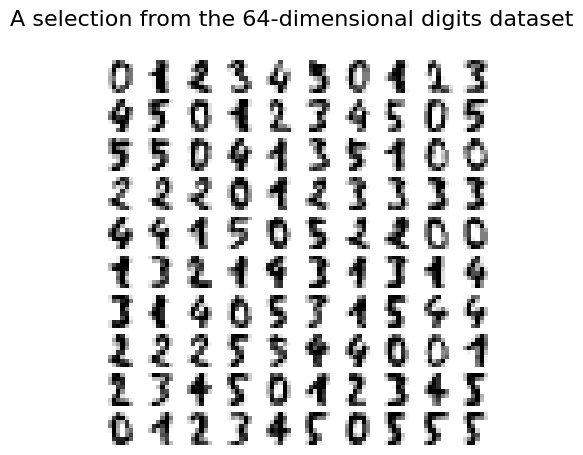

In [ ]:
# 숫자 이미지 시각화
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(5, 5))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

#### 👨‍💻 코드: plot을 도와주는 함수 정의

In [ ]:
# plot helper 함수 정의
def plot_embedding(X, title):
    _, ax = plt.subplots()
    # 정규화
    X = MinMaxScaler().fit_transform(X)
    # 색깔로 숫자로 scatter 표시
    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    # 이미지 그림 표시
    shown_images = np.array([[1.0, 1.0]])
    for i in range(X.shape[0]):
        # 모든 숫자 임베딩을 scatter하고, 숫자 그룹에 annotation box를 보기
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        # 보기 쉽게 하기 위해 너무 가까운 데이터는 보여주지 않기
        if np.min(dist) < 4e-3:
            continue
        # 이미지 합치기
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

t-SNE를 이용하여 높은 차원의 숫자 데이터를 2차원에 시각화합니다.

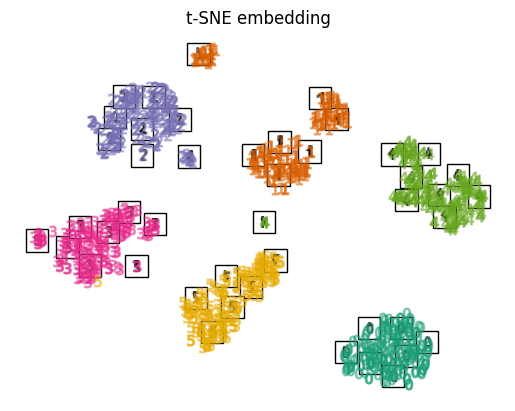

In [ ]:
# t-SNE 적용
transformer = TSNE(n_components=2, random_state=0)
projection = transformer.fit_transform(X, y)

# t-SNE 결과 시각화
plot_embedding(projection, 't-SNE embedding')
plt.show()

위 시각화 그림을 보면, 각 데이터가 숫자 클래스에 의해서 구분된 것을 확인할 수 있는데, 데이터의 패턴을 잘 학습한 embedding 공간을 찾아 시각화하여 이 2차원 공간만으로도 데이터가 서로 비슷하고 다른 특징을 잘 찾았다는 것을 의미합니다. 이로부터 분류 모델 등을 이용하지 않고도 데이터의 구분되는 특징을 파악할 수 있습니다.

위에서 살펴본 Truncated SVD를 적용한 것과 비교해봅니다.

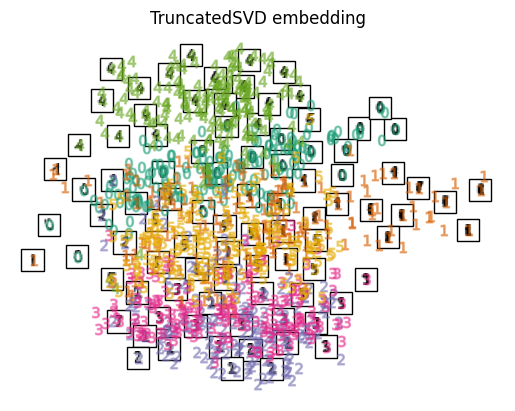

In [ ]:
# Truncated SVD 적용
transformer = TruncatedSVD(n_components=2)
projection = transformer.fit_transform(X, y)

# TruncatedSVD 결과 시각화
plot_embedding(projection, 'TruncatedSVD embedding')
plt.show()

Truncated SVD 시각화로부터 데이터들이 어느정도 구분은 할 수 있으나 클래스 별 거리가 잘 보이지 않는 것을 확인할 수 있습니다. 이처럼 T-SNE는 클래스 별 구분을 명확하게 하는 데에 강점을 가진 것을 확인할 수 있습니다.

## Required Package

sklearn == 1.2.2 <br>
numpy == 1.23.5 <br>
matplotlib == 3.7.1 <br>
seaborn == 0.12.2 <br>

## 콘텐츠 라이선스

저작권 : <font color='blue'> <b> ©2023 by Upstage X fastcampus Co., Ltd. All rights reserved.</font></b>

<font color='red'><b>WARNING</font> : 본 교육 콘텐츠의 지식재산권은 업스테이지 및 패스트캠퍼스에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다. </b>